# Qn 1

In [2]:
import numpy as np

# Convert labels (n,) to one hot matrix (n,K)
def one_hot(y, K=3):
  Y = np.zeros((y.shape[0], K))
  Y[np.arange(y.shape[0]),y] = 1
  return Y

# Row wise softmax with numerical stability
def softmax(Z):
  Z = Z - np.max(Z, axis=1, keepdims=True)
  return np.exp(Z) / np.sum(np.exp(Z), axis=1, keepdims=True)

# Training
def train_softmax(X, y, lr=0.05, epochs=500, W_init=None, b_init=None):
  '''
  Softmax regression layer with 3 classes

  X: (n,2) input features
  y: (n,) labels in {0,1,2}
  lr: learning rate (default 0.05)
  epochs: number of passes
  W_init: (2,3) initial weights
  b_init: (3,) initial biases
  '''

  n, d = X.shape
  K = 3
  Y = one_hot(y, K)

  W = W_init.astype(float)

  if b_init is None:
    b = np.zeros((K,))
  else:
    b = b_init.astype(float)

  # Gradient descent
  for _ in range(epochs):
    Z = X.dot(W) + b  # (n,3) scores
    P = softmax(Z)    # (n,3) probabilities

    # Gradients
    grad_W = (X.T @ (P-Y)) /n #(2,3)
    grad_b = np.sum(P-Y, axis=0) /n

    # Update
    W = W - lr * grad_W
    b = b - lr * grad_b
  return W, b

# Prediction
def predict_proba(X, W, b):
  return softmax(X.dot(W) + b)

def predict(X, W, b):
  return np.argmax(predict_proba(X, W, b), axis=1)

def accuracy(X, y, W, b):
  return np.mean(predict(X, W, b) == y)

# Usage
if __name__ == '__main__':
  X = np.array([
      [0,4],
      [-1,3],
      [2,3],
      [-2,2],
      [0,2],
      [1,2],
      [-1,2],
      [-3,1],
      [-1,1],
      [2,1],
      [4,1],
      [-2,0],
      [1,0],
      [3,0],
      [-3,-1],
      [-2,-1],
      [2,-1],
      [4,-1]
  ])

  # Labels A=0, B=1, C=2
  y = np.array([0,0,0,1,1,0,1,1,1,2,2,1,2,2,1,1,2,2])

  # Initial weights 2x3 and bias 3x1
  W_init = np.array([
      [0.88,0.08,-0.34],
      [0.68,-0.39,-0.19]
  ])
  b_init = np.zeros(3)

  W, b = train_softmax(X, y, lr=0.05,epochs=1, W_init=W_init, b_init=b_init)

  print("After one iteration:\n")
  print(f"Trained Weights:\n",W)
  print(f"Trained Bias:\n",b)

  print(f"Accuracy:\n",predict(X, W, b))
  print(f"Accuracy:",accuracy(X, y, W, b))

  print("\n")
  print("After 1000 iterations:\n")
  W, b = train_softmax(X, y, lr=0.05,epochs=999, W_init=W_init, b_init=b_init)

  print(f"Trained Weights:\n",W)
  print(f"Trained Bias:\n",b)

  print(f"Accuracy:\n",predict(X, W, b))
  print(f"Accuracy:",accuracy(X, y, W, b))


After one iteration:

Trained Weights:
 [[ 0.84659526  0.04527906 -0.27187432]
 [ 0.67222519 -0.37509269 -0.1971325 ]]
Trained Bias:
 [-0.01785539  0.01479533  0.00306006]
Accuracy:
 [0 0 0 2 0 0 0 2 2 0 0 2 0 0 2 2 0 0]
Accuracy: 0.2222222222222222


After 1000 iterations:

Trained Weights:
 [[ 0.19761163 -1.5207758   1.94316417]
 [ 1.53088982  0.01121157 -1.44210139]]
Trained Bias:
 [-1.53167675  1.15788965  0.3737871 ]
Accuracy:
 [0 0 0 1 0 0 1 1 1 2 2 1 2 2 1 1 2 2]
Accuracy: 0.9444444444444444


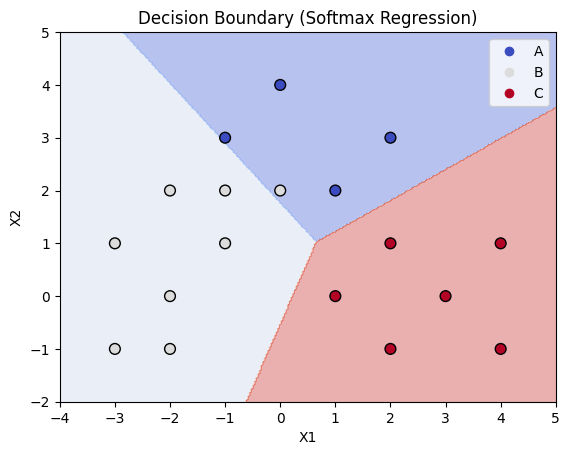

In [3]:
import matplotlib.pyplot as plt

def plot_decision_boundary(X, y, W, b):
  # Create a meshgrid
  x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
  y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
  xx, yy = np.meshgrid(
      np.linspace(x_min, x_max, 300),
      np.linspace(y_min, y_max, 300)
      )

  # Flatten grid and predict
  grid = np.c_[xx.ravel(), yy.ravel()]  # shape (n_points, 2)
  Z = predict(grid, W, b)               # predicted class index
  Z = Z.reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)

  # Plot training points
  scatter = plt.scatter(X[:,0], X[:,1], c=y, s=60, edgecolors='k', cmap=plt.cm.coolwarm)
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.title('Decision Boundary (Softmax Regression)')
  plt.legend(handles=scatter.legend_elements()[0], labels=['A', 'B', 'C'])
  plt.show()

plot_decision_boundary(X, y, W, b)

# Qn 2

Convergence achieved at epoch 205
Time per epoch: 0.0008287203311920166 seconds
Training time: 0.8287203311920166 seconds
Weight: R^2 = -0.40877, MSE = 32.11993
Waist: R^2 = -0.14949, MSE = 2067.97537
Pulse: R^2 = -0.65408, MSE = 1217.40055
MSE Train: 0.7095970164049406
MSE Test: 0.7015762784026384
R2 Train: 0.2904029835950594
R2 Test: -0.40411127139703


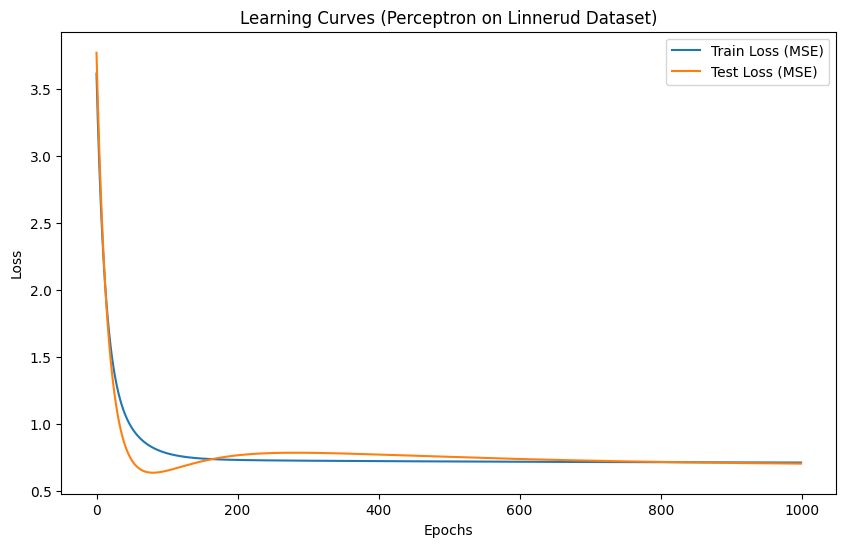

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_linnerud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import time

# Load Linnerud dataset
linnerud = load_linnerud()
X = linnerud.target   # exercise data as input  (3 features)
Y = linnerud.data     # physiological data as target (3 targets)

# Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Normalise inputs and outputs
scaler_X = StandardScaler()
scaler_Y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

Y_train = scaler_Y.fit_transform(Y_train)
Y_test = scaler_Y.transform(Y_test)

# Perceptron (linear regression with gradient descent)
n_samples, n_features = X_train.shape
n_targets = Y_train.shape[1]

# Initialise weights
W = np.random.randn(n_features, n_targets)
b = np.zeros((1,n_targets))

# Training parameters
lr = 0.01
epochs = 1000
tolerance = 1e-4

train_losses = []
test_losses = []

# Timing
start_time = time.time()
convergence_epoch = None

# Gradient descent
for epoch in range(epochs):
  # Forward pass
  Y_pred = np.dot(X_train, W) + b

  # Train loss
  train_loss = mean_squared_error(Y_train, Y_pred)
  train_losses.append(train_loss)

  # Gradient calculation
  grad_W = np.dot(X_train.T, (Y_pred - Y_train)) / n_samples * 2
  grad_b = np.sum((Y_pred - Y_train), axis=0) / n_samples * 2

  # Update weights
  W -= lr * grad_W
  b -= lr * grad_b

  # Evaluate on test set
  Y_test_pred = X_test.dot(W) + b
  test_loss = mean_squared_error(Y_test, Y_test_pred)
  test_losses.append(test_loss)

  # Convergence check
  if epoch > 10:
    if abs(train_losses[-1] - train_losses[-2]) < tolerance and convergence_epoch is None:
      convergence_epoch = epoch
      print(f"Convergence achieved at epoch {convergence_epoch}")

if convergence_epoch is None:
  print(f"Convergence not achieved at epoch {epoch}")

end_time = time.time()
time_per_epoch = (end_time - start_time) / epochs

print(f"Time per epoch: {time_per_epoch} seconds")
print(f"Training time: {end_time - start_time} seconds")


Y_train_pred = X_train.dot(W) + b
Y_test_pred = X_test.dot(W) + b

# Inverse transform to original scale(so errors are meaningful)
Y_test_true = scaler_Y.inverse_transform(Y_test)
Y_test_pred_orig = scaler_Y.inverse_transform(Y_test_pred)

# Per variable R^2 and MSE
for i, name in enumerate(["Weight","Waist","Pulse"]):
  r2 = r2_score(Y_test_true[:,i], Y_test_pred_orig[:,i])
  mse = mean_squared_error(Y_test_true[:,i], Y_test_pred_orig[:,i])
  print(f"{name}: R^2 = {r2:.5f}, MSE = {mse:.5f}")

mse_train = mean_squared_error(Y_train, Y_train_pred)
mse_test = mean_squared_error(Y_test, Y_test_pred)

r2_train = r2_score(Y_train, Y_train_pred)
r2_test = r2_score(Y_test, Y_test_pred)

print(f"MSE Train: {mse_train}")
print(f"MSE Test: {mse_test}")
print(f"R2 Train: {r2_train}")
print(f"R2 Test: {r2_test}")

# Learning curve plot
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Train Loss (MSE)')
plt.plot(test_losses, label='Test Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curves (Perceptron on Linnerud Dataset)')
plt.legend()
plt.show()

Weight is best predicted by exercise data

Convergence achieved at epoch 298
Time per epoch: 0.000507634162902832 seconds
Training time: 0.507634162902832 seconds
Weight: R^2 = -0.40973, MSE = 32.14178
Waist: R^2 = -1.71605, MSE = 4886.27744
Pulse: R^2 = -0.54555, MSE = 1137.52386
MSE Train: 0.708528655964611
MSE Test: 0.9433702639544604
R2 Train: 0.291471344035389
R2 Test: -0.8904410291500081


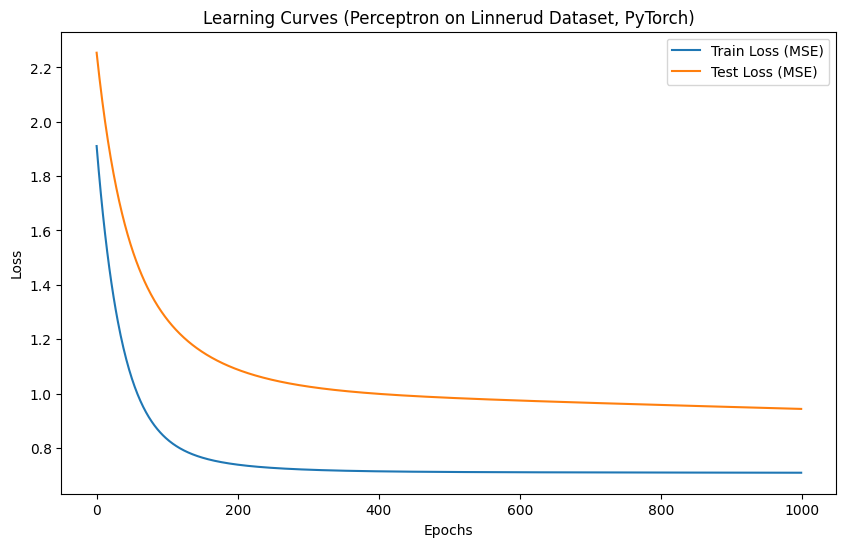

In [26]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import load_linnerud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import time

# Load Linnerud dataset
linnerud = load_linnerud()
X = linnerud.target   # exercise data as input  (3 features)
Y = linnerud.data     # physiological data as target (3 targets)

# Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Normalise inputs and outputs
scaler_X = StandardScaler()
scaler_Y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

Y_train = scaler_Y.fit_transform(Y_train)
Y_test = scaler_Y.transform(Y_test)

# Convert to torch tensors
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
Y_train_torch = torch.tensor(Y_train, dtype=torch.float32)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
Y_test_torch = torch.tensor(Y_test, dtype=torch.float32)

# Perceptron (linear)
n_features = X_train.shape[1]
n_targets = Y_train.shape[1]

model = nn.Linear(n_features, n_targets) # weights + bias handled internally

# Loss and optimiser
criterion = nn.MSELoss()  # MSE
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training parameters
epochs = 1000

train_losses = []
test_losses = []

# Timing
start_time = time.time()
convergence_epoch = None
tolerance = 1e-4 # Amount of loss to count as "still improving"

# Gradient descent
for epoch in range(epochs):
  # Forward pass
  Y_pred = model(X_train_torch)
  loss = criterion(Y_pred, Y_train_torch)

  # Backward pass
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  train_losses.append(loss.item())

  # Evaluate on test set
  with torch.no_grad():
    Y_test_pred = model(X_test_torch)
    test_loss = criterion(Y_test_pred, Y_test_torch).item()
    test_losses.append(test_loss)

  # Check for convergence
  if epoch > 10:
    if abs(train_losses[-1] - train_losses[-2]) < tolerance and convergence_epoch is None:
      convergence_epoch = epoch
      print(f"Convergence achieved at epoch {convergence_epoch}")

if convergence_epoch is None:
  print("Convergence not achieved")

end_time = time.time()
time_per_epoch = (end_time - start_time) / epochs

print(f"Time per epoch: {time_per_epoch} seconds")
print(f"Training time: {end_time - start_time} seconds")

with torch.no_grad():
  Y_train_pred = model(X_train_torch).numpy()
  Y_test_pred = model(X_test_torch).numpy()

# Inverse transform to original scale(so errors are meaningful)
Y_test_true = scaler_Y.inverse_transform(Y_test)
Y_test_pred_orig = scaler_Y.inverse_transform(Y_test_pred)

# Per variable R^2 and MSE
for i, name in enumerate(["Weight","Waist","Pulse"]):
  r2 = r2_score(Y_test_true[:,i], Y_test_pred_orig[:,i])
  mse = mean_squared_error(Y_test_true[:,i], Y_test_pred_orig[:,i])
  print(f"{name}: R^2 = {r2:.5f}, MSE = {mse:.5f}")

mse_train = mean_squared_error(Y_train, Y_train_pred)
mse_test = mean_squared_error(Y_test, Y_test_pred)

r2_train = r2_score(Y_train, Y_train_pred)
r2_test = r2_score(Y_test, Y_test_pred)

print(f"MSE Train: {mse_train}")
print(f"MSE Test: {mse_test}")
print(f"R2 Train: {r2_train}")
print(f"R2 Test: {r2_test}")

# Learning curve plot
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Train Loss (MSE)')
plt.plot(test_losses, label='Test Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curves (Perceptron on Linnerud Dataset, PyTorch)')
plt.legend()
plt.show()

Weight is best predicted by exercise data


- More epochs to reach convergence for PyTorch
- Less time taken for a weight update for PyTorch

# Qn 3

In [27]:
90/150 # train

0.6

In [28]:
60/150 # test

0.4

In [29]:
# softmax layer, mini batch gradient descent
# cross entropy and classification accuracy against epoch for both train and test
# lr = 0.1, batch size = 16, number of epochs = 1000
# repeat for batch size 2,4,8,16,32,64
# compare accuracies and time taken for an epoch

Batch Size: 16
Average time per epoch: 0.00046 seconds


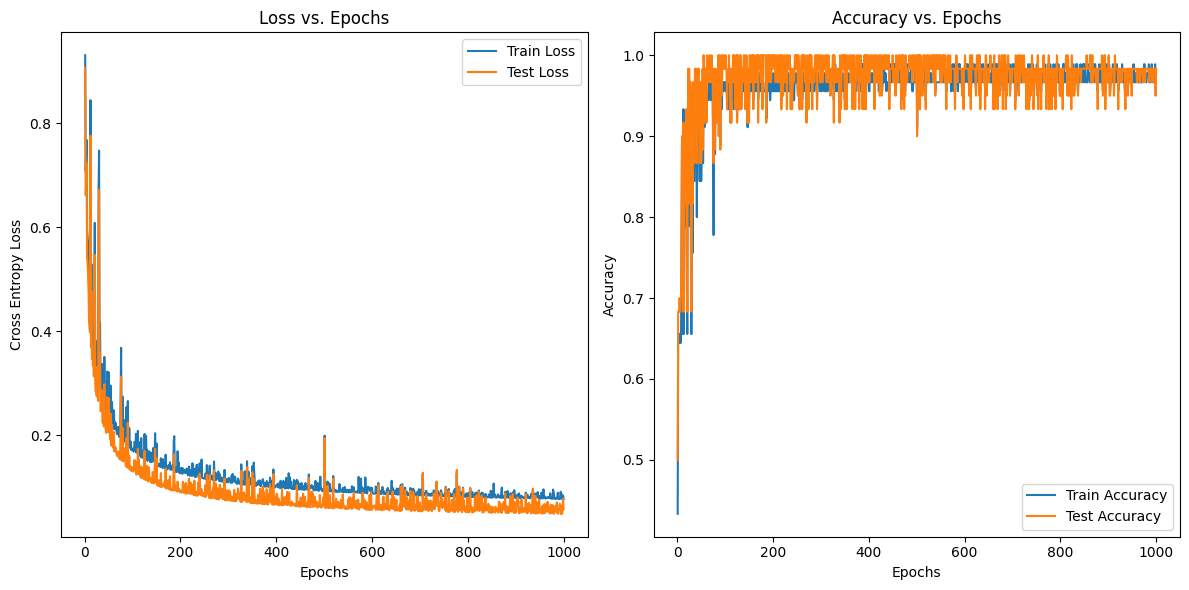

In [33]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import time

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data # (150,4)
y = iris.target.reshape(-1,1)

# One hot encode labels
enc = OneHotEncoder(sparse_output=False)
Y = enc.fit_transform(y)

# Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

n_features = X_train.shape[1]
n_classes = Y.shape[1]

def softmax(z):
  exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
  return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def cross_entropy_loss(Y_pred, Y_true):
  eps = 1e-12
  return -np.mean(np.sum(Y_true * np.log(Y_pred + eps), axis=1))

def accuracy(Y_pred, Y_true):
  return np.mean(np.argmax(Y_pred, axis=1) == np.argmax(Y_true, axis=1))

# Training loop with timing
def train_softmax(batch_size, lr=0.1, epochs=1000):
  W = np.zeros((n_features, n_classes))
  b = np.zeros((1,n_classes))

  train_losses = []
  test_losses = []
  train_accuracies = []
  test_accuracies = []
  epoch_times = []

  n = X_train.shape[0]

  for epoch in range(epochs):
    start_time = time.time()

    # Shuffle
    idx = np.random.permutation(n)
    X_shuf = X_train[idx]
    Y_shuf = Y_train[idx]

    # Mini batch updates
    for i in range(0, n, batch_size):
      X_batch = X_shuf[i:i+batch_size]
      Y_batch = Y_shuf[i:i+batch_size]

      logits = X_batch @ W + b
      Y_pred = softmax(logits)

      grad_W = X_batch.T @ (Y_pred - Y_batch) / batch_size
      grad_b = np.sum(Y_pred - Y_batch, axis=0, keepdims=True) / batch_size

      W -= lr * grad_W
      b -= lr * grad_b

    # Evaluate
    train_probs = softmax(X_train @ W + b)
    test_probs = softmax(X_test @ W + b)

    train_loss = cross_entropy_loss(train_probs, Y_train)
    train_losses.append(train_loss)

    train_acc = accuracy(train_probs, Y_train)
    train_accuracies.append(train_acc)

    test_loss = cross_entropy_loss(test_probs, Y_test)
    test_losses.append(test_loss)

    test_acc = accuracy(test_probs, Y_test)
    test_accuracies.append(test_acc)

    epoch_times.append(time.time() - start_time)

  return train_losses, test_losses, train_accuracies, test_accuracies, epoch_times

# Run for a batch size
batch_size = 16
train_losses, test_losses, train_accuracies, test_accuracies, epoch_times = train_softmax(batch_size)

print(f"Batch Size: {batch_size}")
print(f"Average time per epoch: {np.mean(epoch_times):.5f} seconds")

# Plot Loss and Accuracy
epochs = range(1,len(train_losses)+1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.title('Loss vs. Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()

plt.tight_layout()
plt.show()

Batch Size: 2
Average time per epoch: 0.00181 seconds


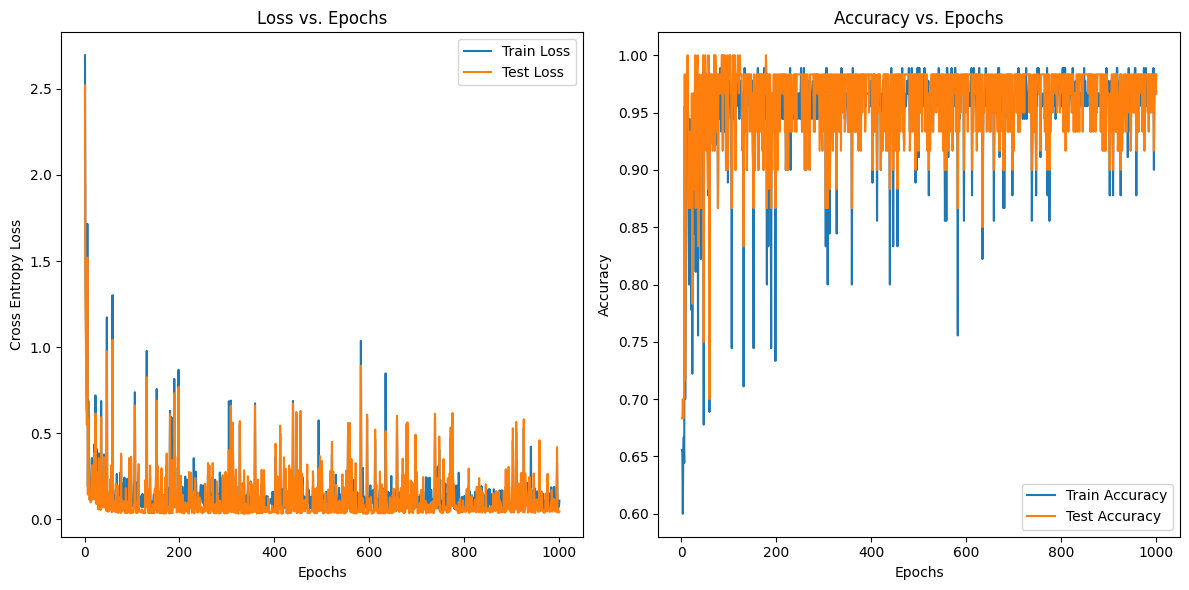

In [34]:
# Run for a batch size
batch_size = 2
train_losses, test_losses, train_accuracies, test_accuracies, epoch_times = train_softmax(batch_size)

print(f"Batch Size: {batch_size}")
print(f"Average time per epoch: {np.mean(epoch_times):.5f} seconds")

# Plot Loss and Accuracy
epochs = range(1,len(train_losses)+1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.title('Loss vs. Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()

plt.tight_layout()
plt.show()

Batch Size: 4
Average time per epoch: 0.00162 seconds


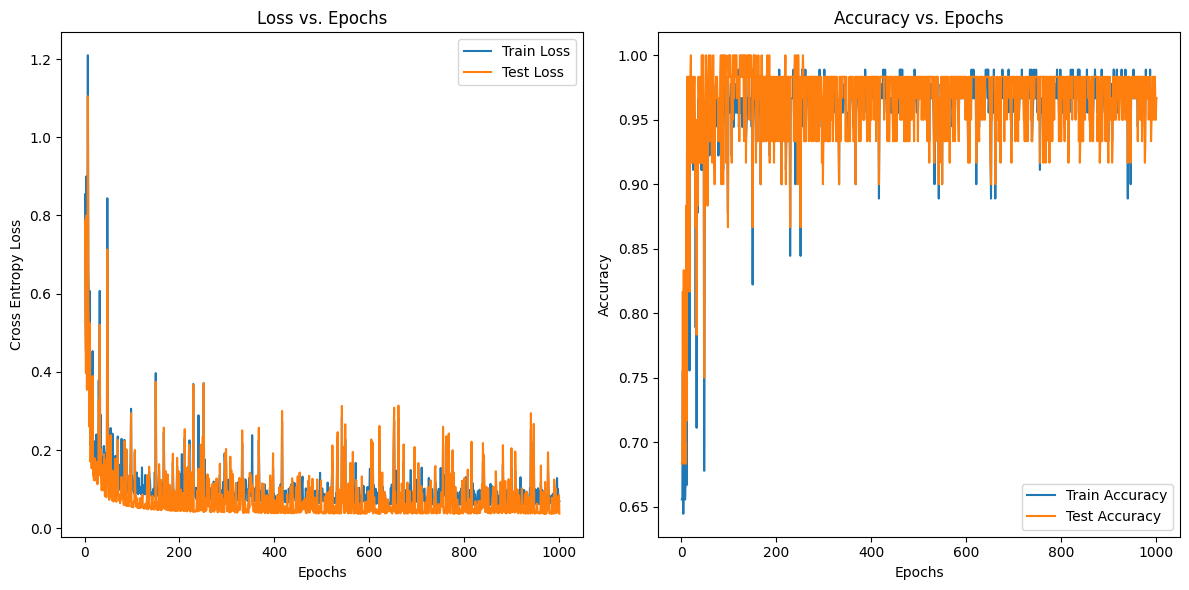

In [35]:
# Run for a batch size
batch_size = 4
train_losses, test_losses, train_accuracies, test_accuracies, epoch_times = train_softmax(batch_size)

print(f"Batch Size: {batch_size}")
print(f"Average time per epoch: {np.mean(epoch_times):.5f} seconds")

# Plot Loss and Accuracy
epochs = range(1,len(train_losses)+1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.title('Loss vs. Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()

plt.tight_layout()
plt.show()

Batch Size: 8
Average time per epoch: 0.00071 seconds


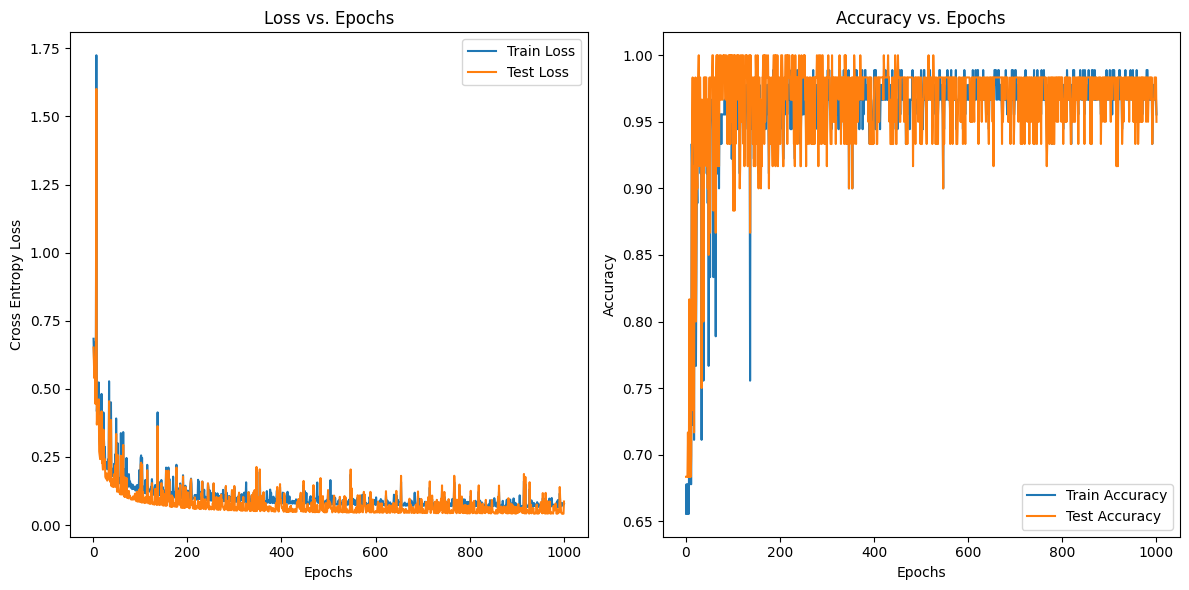

In [36]:
# Run for a batch size
batch_size = 8
train_losses, test_losses, train_accuracies, test_accuracies, epoch_times = train_softmax(batch_size)

print(f"Batch Size: {batch_size}")
print(f"Average time per epoch: {np.mean(epoch_times):.5f} seconds")

# Plot Loss and Accuracy
epochs = range(1,len(train_losses)+1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.title('Loss vs. Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()

plt.tight_layout()
plt.show()

Batch Size: 24
Average time per epoch: 0.00038 seconds


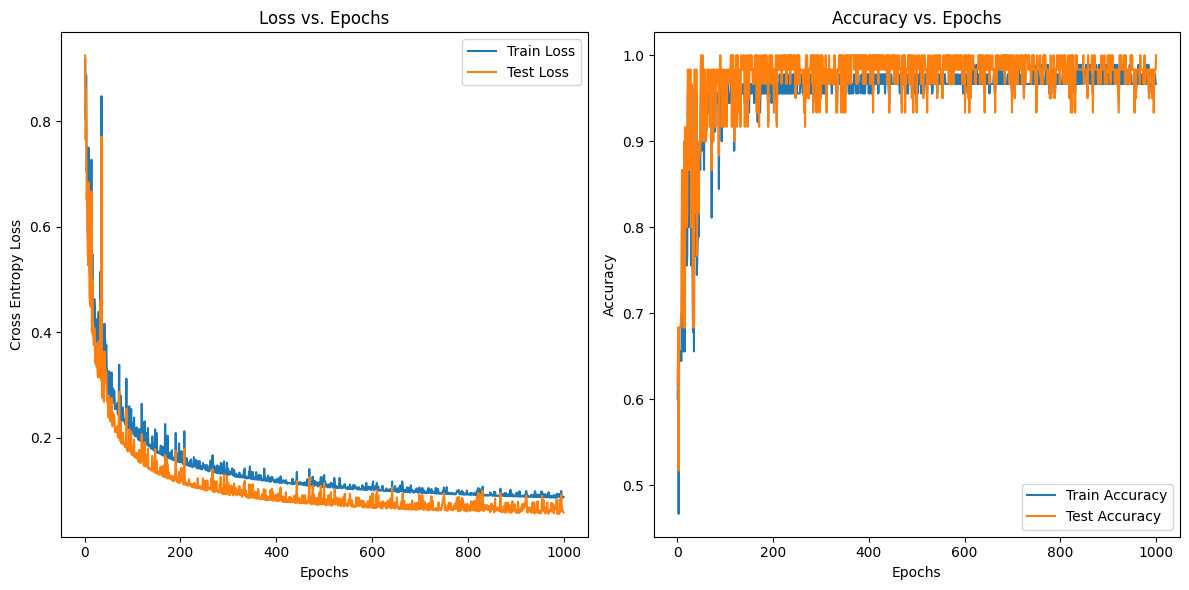

In [37]:
# Run for a batch size
batch_size = 24
train_losses, test_losses, train_accuracies, test_accuracies, epoch_times = train_softmax(batch_size)

print(f"Batch Size: {batch_size}")
print(f"Average time per epoch: {np.mean(epoch_times):.5f} seconds")

# Plot Loss and Accuracy
epochs = range(1,len(train_losses)+1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.title('Loss vs. Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()

plt.tight_layout()
plt.show()

Batch Size: 32
Average time per epoch: 0.00033 seconds


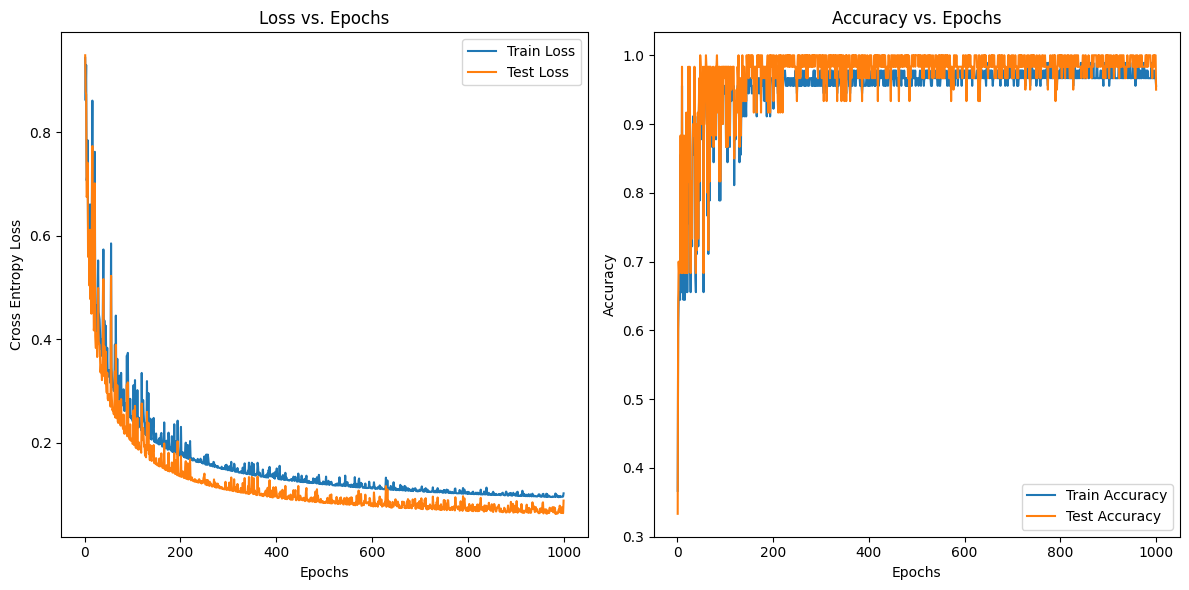

In [38]:
# Run for a batch size
batch_size = 32
train_losses, test_losses, train_accuracies, test_accuracies, epoch_times = train_softmax(batch_size)

print(f"Batch Size: {batch_size}")
print(f"Average time per epoch: {np.mean(epoch_times):.5f} seconds")

# Plot Loss and Accuracy
epochs = range(1,len(train_losses)+1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.title('Loss vs. Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()

plt.tight_layout()
plt.show()

Batch Size: 64
Average time per epoch: 0.00047 seconds


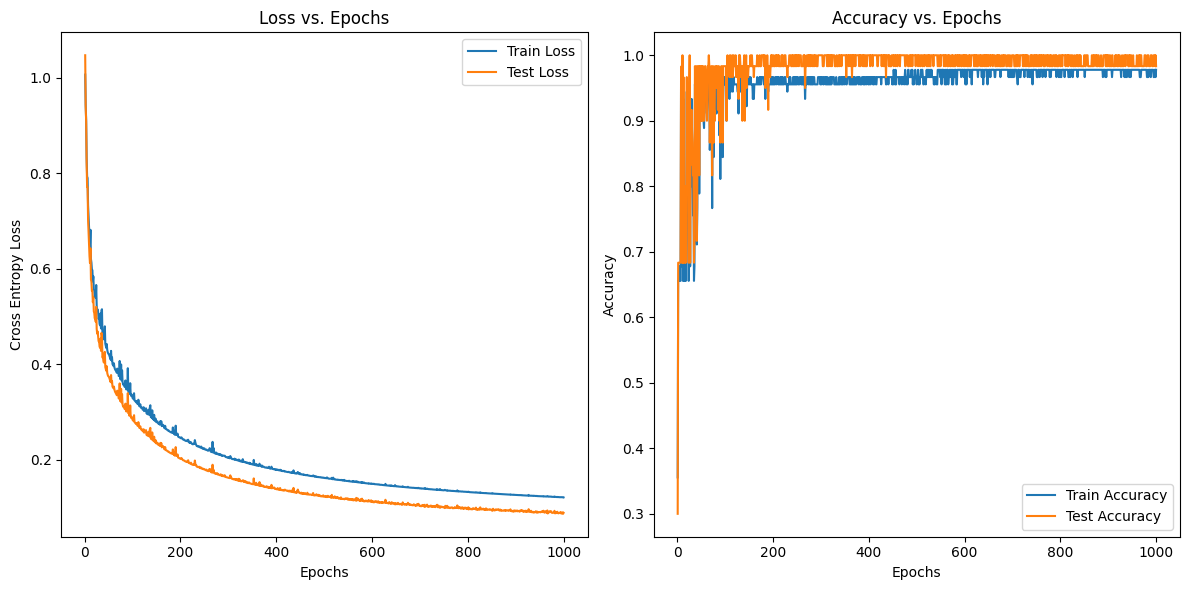

In [39]:
# Run for a batch size
batch_size = 64
train_losses, test_losses, train_accuracies, test_accuracies, epoch_times = train_softmax(batch_size)

print(f"Batch Size: {batch_size}")
print(f"Average time per epoch: {np.mean(epoch_times):.5f} seconds")

# Plot Loss and Accuracy
epochs = range(1,len(train_losses)+1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.title('Loss vs. Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()

plt.tight_layout()
plt.show()

- Generally, as the batch size increases, the time taken for an epoch decreases
- The accuracies are higher for larger batch sizes